In [1]:
import healpy as hp
from astropy.io import fits
import numpy as np
import treecorr
import sys, os
sys.path.append('/mnt/home/spandey/ceph/esutil/esutil')
# import esutil.coords
import coords
import matplotlib
%matplotlib inline
import matplotlib.pyplot as pl






/tmp/ipykernel_1332244/764411451.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_ratio_all[js] = (snr_abs/snr_sq)


Text(0, 0.5, 'SNR$_{\\rm abs}$/SNR$_{\\rm sq}$')

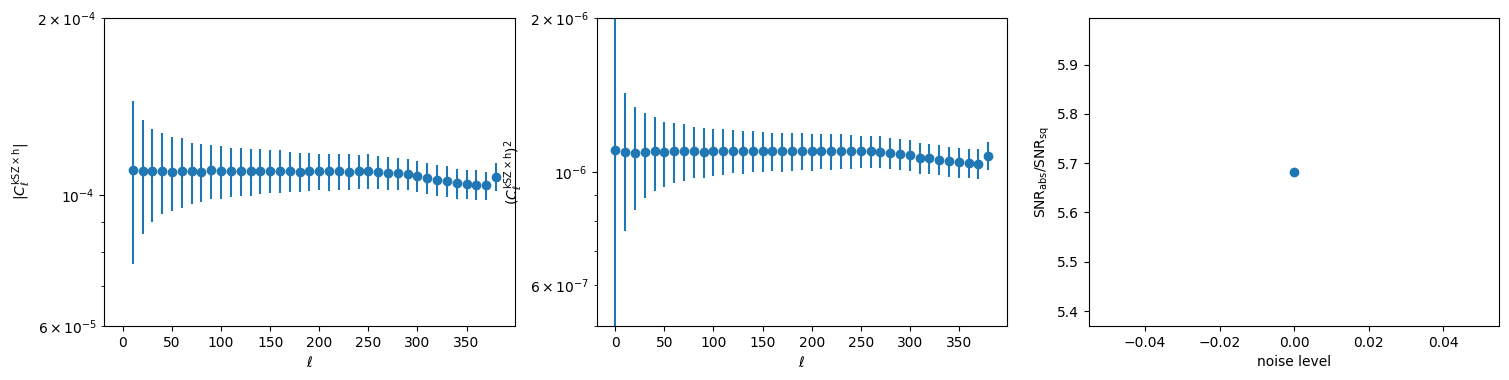

In [6]:
# make a three panel figure, left showing cl12_abs, middle showing cl12_sq, right showing snr_abs/snr_sq
import pickle as pk
import matplotlib.pyplot as pl
noise_std_level_array = [0.0]
# noise_std_level_array = [0.0, 1.0, 2.0]
snr_ratio_all = np.zeros((len(noise_std_level_array)))
pl.figure(figsize=(18,4))
for js in range(len(noise_std_level_array)):
    df = pk.load(open('TEST_GRF_LOGNORM_SAMP_saved_noise_level_'+str(noise_std_level_array[js])+'.pkl', 'rb'))
    cl12_abs_mean = df['cl1_mean']
    cl12_abs_std = df['cl1_std']
    cl12_sq_mean = df['cl2_mean']
    cl12_sq_std = df['cl2_std']
    snr_abs = df['snr_abs']
    snr_sq = df['snr_sq']
    snr_ratio_all[js] = (snr_abs/snr_sq)
    pl.subplot(1,3,1)
    ell = np.arange(len(cl12_abs_mean))
    if js < 3:
        pl.errorbar(2*js+ell[::10], cl12_abs_mean[::10], yerr=cl12_abs_std[::10], fmt='o', label='noise level = '+str(noise_std_level_array[js]))
        pl.yscale('log')
        pl.xlabel(r'$\ell$')
        pl.ylabel(r'$|C^{\rm kSZ \times h}_{\ell}|$')
        pl.ylim(6e-5, 2e-4)

    pl.subplot(1,3,2)
    if js < 3:
        ell = np.arange(len(cl12_sq_mean))
        pl.errorbar(2*js + ell[::10], cl12_sq_mean[::10], yerr=cl12_sq_std[::10], fmt='o', label='noise level = '+str(noise_std_level_array[js]))
        pl.ylim(5e-7, 2e-6)
        pl.yscale('log')
        pl.xlabel(r'$\ell$')
        pl.ylabel(r'$(C^{\rm kSZ \times h}_{\ell})^2$')


pl.subplot(1,3,3)
pl.plot(noise_std_level_array, snr_ratio_all, 'o-')
pl.xlabel(r'noise level')
pl.ylabel(r'SNR$_{\rm abs}$/SNR$_{\rm sq}$')
    



In [2]:
# grf1 = hp.
nside = 128
npix = hp.nside2npix(nside)
grf1 = np.exp(np.random.normal(size=npix))
# grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
vel_random = 0.1*(np.random.normal(size=npix))
grf2 = (grf1) * vel_random



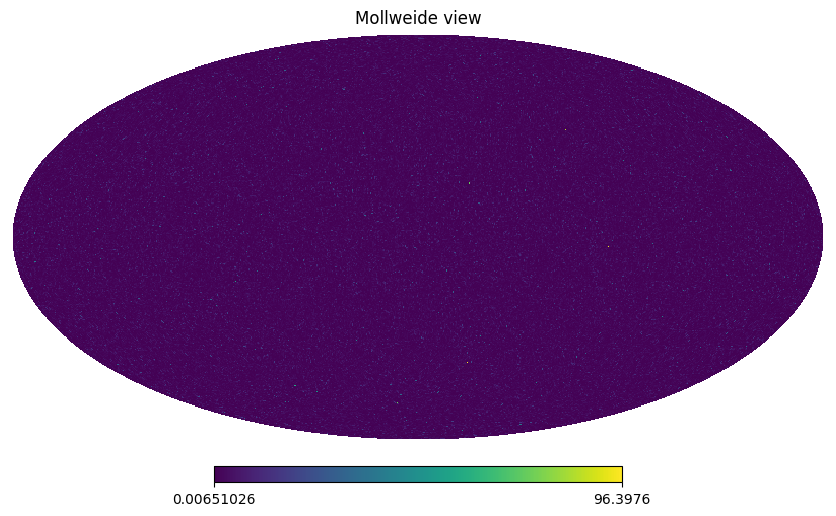

In [3]:
hp.mollview(grf1)



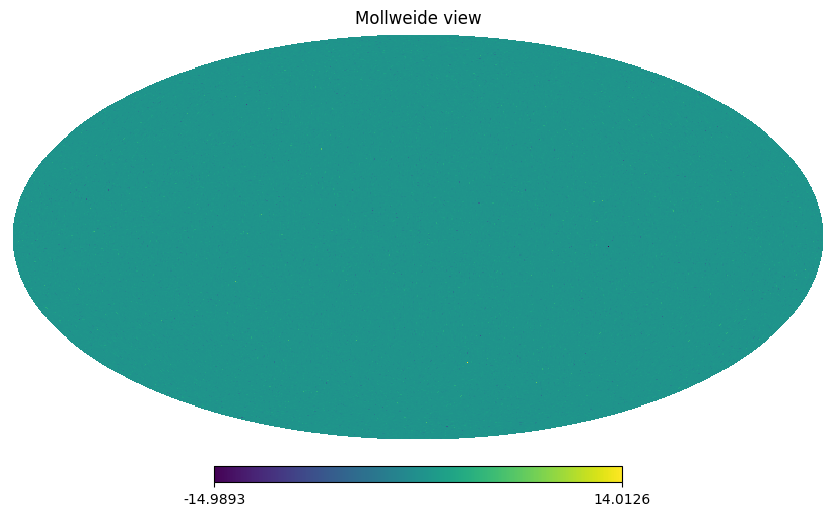

In [4]:
hp.mollview(grf2)



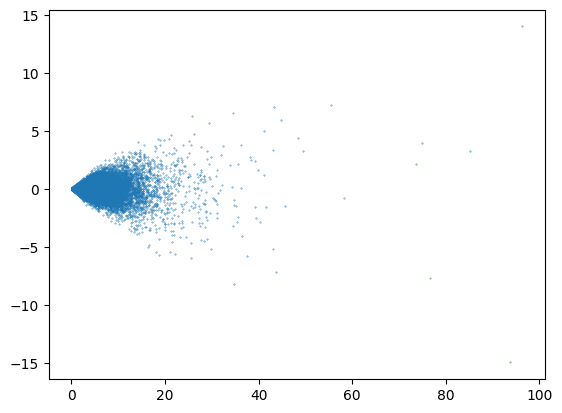

In [5]:
pl.figure()
pl.scatter(grf1, grf2, s=0.1)


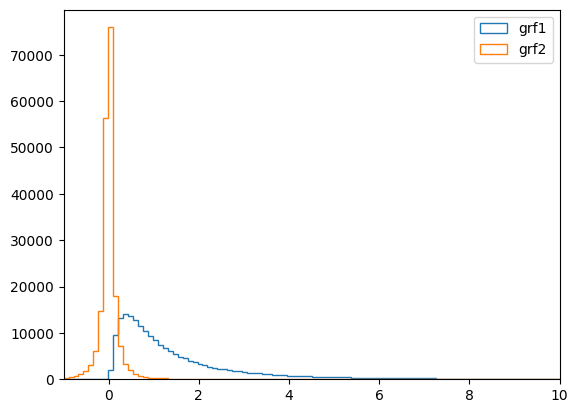

In [6]:
pl.figure()
_ = pl.hist(grf1, bins=100, range=(-1,10), histtype='step', label='grf1')
_ = pl.hist(grf2, bins=100, range=(-1,10), histtype='step', label='grf2')
pl.xlim(-1,10)
pl.legend()


In [7]:
# get the power spectrum:
cl1 = hp.anafast(grf1)
cl2 = hp.anafast(grf2)
cl12 = hp.anafast(grf1, grf2)
cl12_abs = hp.anafast(grf1, np.abs(grf2))
cl12_sq = hp.anafast(grf1, grf2**2)



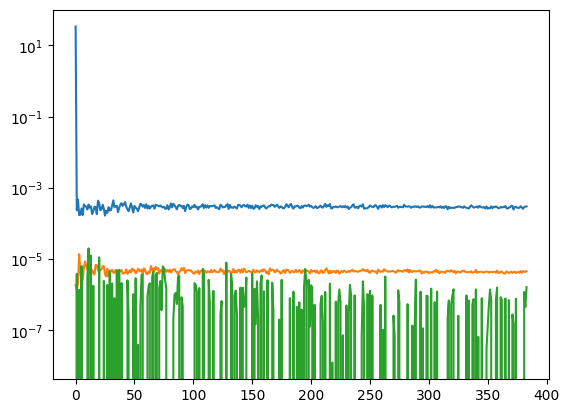

In [8]:
ell = np.arange(len(cl1))
pl.figure()
pl.plot(ell, cl1, label='cl1')
pl.plot(ell, cl2, label='cl2')
pl.plot(ell, cl12, label='cl12')
# pl.xscale('log')
pl.yscale('log')




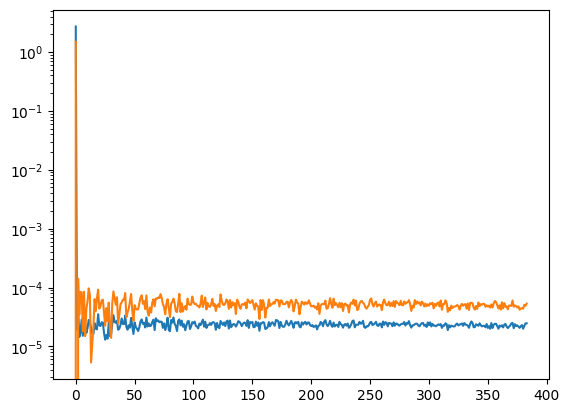

In [9]:
ell = np.arange(len(cl1))
pl.figure()
pl.plot(ell, cl12_abs, label='cl1')
pl.plot(ell, cl12_sq, label='cl2')
# pl.plot(ell, cl12, label='cl12')
# pl.xscale('log')
pl.yscale('log')
# pl.ylim(0, 2e-8)




In [27]:
# grf1 = hp.
# nside = 128
# npix = hp.nside2npix(nside)
# grf1 = np.exp(np.random.normal(size=npix))
# # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
# vel_random = 0.1*(np.random.normal(size=npix))
# grf2 = (grf1) * vel_random

# lognormal case:

# noise_std_level_array = [0.0, 1.0, 5.0, 10.0, 50.0, 100.0]
noise_std_level_array = [2.0, 3.0, 4.0]
snr_orig_all = np.zeros(len(noise_std_level_array))
snr_abs_all = np.zeros(len(noise_std_level_array))
snr_sq_all = np.zeros(len(noise_std_level_array))

for js in range(len(noise_std_level_array)):
    from tqdm import tqdm
    nside = 128
    npix = hp.nside2npix(nside)
    nsims = 2048
    cl1_all = []
    cl2_all = []
    cl12_all = []
    cl12_abs_all = []
    cl12_sq_all = []
    for ji in tqdm(range(nsims)):
        grf1_noiseless = np.exp(np.random.normal(size=npix))
        grf1 = grf1_noiseless + noise_std_level_array[js]*np.std(grf1_noiseless)*np.random.randn(npix)
        grf1 = grf1/np.mean(grf1) - 1.
        # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
        vel_random = 0.1*(np.random.normal(size=npix))
        grf2_noiseless = (grf1) * vel_random
        grf2 = grf2_noiseless + noise_std_level_array[js]*np.std(grf2_noiseless)*np.random.randn(npix)

        # get the power spectrum:
        cl1 = hp.anafast(grf1)
        cl2 = hp.anafast(grf2)
        cl12 = hp.anafast(grf1, grf2)
        cl12_abs = hp.anafast(grf1, np.abs(grf2))
        cl12_sq = hp.anafast(grf1, grf2**2)

        cl1_all.append(cl1)
        cl2_all.append(cl2)
        cl12_all.append(cl12)
        cl12_abs_all.append(cl12_abs)
        cl12_sq_all.append(cl12_sq)

    cl1_all = np.array(cl1_all)
    cl2_all = np.array(cl2_all)
    cl12_all = np.array(cl12_all)
    cl12_abs_all = np.array(cl12_abs_all)
    cl12_sq_all = np.array(cl12_sq_all)

    cl1_mean = np.mean(cl1_all, axis=0)
    cl2_mean = np.mean(cl2_all, axis=0)
    cl12_mean = np.mean(cl12_all, axis=0)
    cl12_abs_mean = np.mean(cl12_abs_all, axis=0)
    cl12_sq_mean = np.mean(cl12_sq_all, axis=0)

    cl1_std = np.std(cl1_all, axis=0)
    cl2_std = np.std(cl2_all, axis=0)
    cl12_std = np.std(cl12_all, axis=0)
    cl12_abs_std = np.std(cl12_abs_all, axis=0)
    cl12_sq_std = np.std(cl12_sq_all, axis=0)


    snr_1 = np.sqrt(np.matmul(cl1_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl1_all.T)[1:,1:]), cl1_mean[1:,None])))
    snr_2 = np.sqrt(np.matmul(cl2_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl2_all.T)[1:,1:]), cl2_mean[1:,None])))
    snr_orig = np.sqrt(np.matmul(cl12_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_all.T)[1:,1:]), cl12_mean[1:,None])))
    snr_abs = np.sqrt(np.matmul(cl12_abs_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_abs_all.T)[1:,1:]), cl12_abs_mean[1:,None])))
    snr_sq = np.sqrt(np.matmul(cl12_sq_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_sq_all.T)[1:,1:]), cl12_sq_mean[1:,None])))

    snr_orig_all[js] = snr_orig
    snr_abs_all[js] = snr_abs
    snr_sq_all[js] = snr_sq

    print('for noise level = ', noise_std_level_array[js], '; snr_orig = ', snr_orig, ' snr_abs = ', snr_abs, ' snr_sq = ', snr_sq)
    saved = {'cl12_all': cl12_all, 'cl12_abs_all': cl12_abs_all, 'cl12_sq_all': cl12_sq_all, 'cl12_mean': cl12_mean, 
             'cl12_abs_mean': cl12_abs_mean, 'cl12_sq_mean': cl12_sq_mean, 'cl12_std': cl12_std, 'cl12_abs_std': cl12_abs_std, 
             'cl12_sq_std': cl12_sq_std, 'snr_orig': snr_orig, 'snr_abs': snr_abs, 'snr_sq': snr_sq,
             'snr_1': snr_1, 'snr_2': snr_2,
             'grf1_eg_wnoise':grf1, 'grf2_eg_wnoise':grf2, 'grf1_eg_noiseless': grf1_noiseless, 'grf2_eg_noiseless': grf2_noiseless}

    import pickle as pk
    pk.dump(saved, open('TEST_GRF_LOGNORM_saved_noise_level_'+str(noise_std_level_array[js])+'.pkl', 'wb'))



100%|██████████| 2048/2048 [02:44<00:00, 12.45it/s]
/tmp/ipykernel_458185/1504809729.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_orig_all[js] = snr_orig
/tmp/ipykernel_458185/1504809729.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_abs_all[js] = snr_abs
/tmp/ipykernel_458185/1504809729.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_sq_all[js] = snr_sq


for noise level =  2.0 ; snr_orig =  [[0.49335855]]  snr_abs =  [[10.00726871]]  snr_sq =  [[3.63313525]]


100%|██████████| 2048/2048 [02:42<00:00, 12.59it/s]


for noise level =  3.0 ; snr_orig =  [[0.469404]]  snr_abs =  [[3.33904074]]  snr_sq =  [[2.37428093]]


100%|██████████| 2048/2048 [02:42<00:00, 12.63it/s]

for noise level =  4.0 ; snr_orig =  [[0.50166953]]  snr_abs =  [[1.20178646]]  snr_sq =  [[1.41311558]]


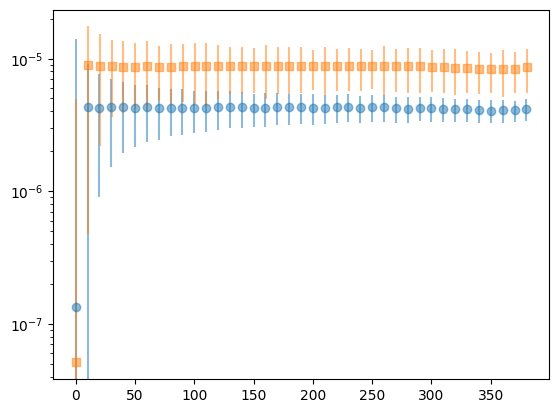

In [34]:
df = pk.load(open('TEST_GRF_LOGNORM_saved_noise_level_'+str(1.0)+'.pkl', 'rb'))
cl12_abs_mean = df['cl12_abs_mean']
cl12_abs_std = df['cl12_abs_std']
cl12_sq_mean = df['cl12_sq_mean']
cl12_sq_std = df['cl12_sq_std']
pl.figure()
pl.errorbar(np.arange(len(cl12_abs_mean))[::10], cl12_abs_mean[::10], cl12_abs_std[::10], ls='', marker='o', label='cl1', alpha=0.5)
pl.errorbar(np.arange(len(cl12_sq_mean))[::10]+0.2, cl12_sq_mean[::10], cl12_sq_std[::10], ls='', marker='s', label='cl2', alpha=0.5)
# pl.xscale('log')
pl.yscale('log')



In [36]:
# grf1 = hp.
# nside = 128
# npix = hp.nside2npix(nside)
# grf1 = np.exp(np.random.normal(size=npix))
# # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
# vel_random = 0.1*(np.random.normal(size=npix))
# grf2 = (grf1) * vel_random

# lognormal case:

# noise_std_level_array = [0.0, 1.0, 5.0, 10.0, 50.0, 100.0]
noise_std_level_array = [0.0, 1.0, 2.0, 3.0, 4.0]
snr_orig_all = np.zeros(len(noise_std_level_array))
snr_abs_all = np.zeros(len(noise_std_level_array))
snr_sq_all = np.zeros(len(noise_std_level_array))

for js in range(len(noise_std_level_array)):
    from tqdm import tqdm
    nside = 128
    npix = hp.nside2npix(nside)
    nsims = 2048
    cl1_all = []
    cl2_all = []
    cl12_all = []
    cl12_abs_all = []
    cl12_sq_all = []
    for ji in tqdm(range(nsims)):
        grf1_noiseless = np.exp(np.random.normal(size=npix))
        grf1 = grf1_noiseless + noise_std_level_array[js]*np.std(grf1_noiseless)*np.random.randn(npix)
        grf1 = grf1/np.mean(grf1) - 1.
        # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
        vel_random = 0.1*(np.random.normal(size=npix))
        grf2_noiseless = (grf1+1) * vel_random
        grf2 = grf2_noiseless + noise_std_level_array[js]*np.std(grf2_noiseless)*np.random.randn(npix)

        # get the power spectrum:
        cl1 = hp.anafast(grf1)
        cl2 = hp.anafast(grf2)
        cl12 = hp.anafast(grf1, grf2)
        cl12_abs = hp.anafast(grf1, np.abs(grf2))
        cl12_sq = hp.anafast(grf1, grf2**2)

        cl1_all.append(cl1)
        cl2_all.append(cl2)
        cl12_all.append(cl12)
        cl12_abs_all.append(cl12_abs)
        cl12_sq_all.append(cl12_sq)

    cl1_all = np.array(cl1_all)
    cl2_all = np.array(cl2_all)
    cl12_all = np.array(cl12_all)
    cl12_abs_all = np.array(cl12_abs_all)
    cl12_sq_all = np.array(cl12_sq_all)

    cl1_mean = np.mean(cl1_all, axis=0)
    cl2_mean = np.mean(cl2_all, axis=0)
    cl12_mean = np.mean(cl12_all, axis=0)
    cl12_abs_mean = np.mean(cl12_abs_all, axis=0)
    cl12_sq_mean = np.mean(cl12_sq_all, axis=0)

    cl1_std = np.std(cl1_all, axis=0)
    cl2_std = np.std(cl2_all, axis=0)
    cl12_std = np.std(cl12_all, axis=0)
    cl12_abs_std = np.std(cl12_abs_all, axis=0)
    cl12_sq_std = np.std(cl12_sq_all, axis=0)


    snr_1 = np.sqrt(np.matmul(cl1_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl1_all.T)[1:,1:]), cl1_mean[1:,None])))
    snr_2 = np.sqrt(np.matmul(cl2_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl2_all.T)[1:,1:]), cl2_mean[1:,None])))
    snr_orig = np.sqrt(np.matmul(cl12_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_all.T)[1:,1:]), cl12_mean[1:,None])))
    snr_abs = np.sqrt(np.matmul(cl12_abs_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_abs_all.T)[1:,1:]), cl12_abs_mean[1:,None])))
    snr_sq = np.sqrt(np.matmul(cl12_sq_mean[1:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_sq_all.T)[1:,1:]), cl12_sq_mean[1:,None])))

    snr_orig_all[js] = snr_orig
    snr_abs_all[js] = snr_abs
    snr_sq_all[js] = snr_sq

    print('for noise level = ', noise_std_level_array[js], '; snr_orig = ', snr_orig, ' snr_abs = ', snr_abs, ' snr_sq = ', snr_sq, ' snr_1 = ', snr_1, ' snr_2 = ', snr_2)
    saved = {'cl12_all': cl12_all, 'cl12_abs_all': cl12_abs_all, 'cl12_sq_all': cl12_sq_all, 'cl12_mean': cl12_mean, 
             'cl12_abs_mean': cl12_abs_mean, 'cl12_sq_mean': cl12_sq_mean, 'cl12_std': cl12_std, 'cl12_abs_std': cl12_abs_std, 
             'cl12_sq_std': cl12_sq_std, 'snr_orig': snr_orig, 'snr_abs': snr_abs, 'snr_sq': snr_sq,
             'snr_1': snr_1, 'snr_2': snr_2,
             'grf1_eg_wnoise':grf1, 'grf2_eg_wnoise':grf2, 'grf1_eg_noiseless': grf1_noiseless, 'grf2_eg_noiseless': grf2_noiseless}

    import pickle as pk
    pk.dump(saved, open('TEST_GRF_LOGNORM_deltap1_saved_noise_level_'+str(noise_std_level_array[js])+'.pkl', 'wb'))



100%|██████████| 2048/2048 [02:45<00:00, 12.35it/s]
/tmp/ipykernel_458185/3277176055.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_orig_all[js] = snr_orig
/tmp/ipykernel_458185/3277176055.py:75: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_abs_all[js] = snr_abs
/tmp/ipykernel_458185/3277176055.py:76: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  snr_sq_all[js] = snr_sq


for noise level =  0.0 ; snr_orig =  [[0.46761807]]  snr_abs =  [[40.04831292]]  snr_sq =  [[6.28053653]]  snr_1 =  [[54.06830916]]  snr_2 =  [[42.01501043]]


100%|██████████| 2048/2048 [02:43<00:00, 12.52it/s]


for noise level =  1.0 ; snr_orig =  [[0.48910604]]  snr_abs =  [[36.172348]]  snr_sq =  [[6.7599251]]  snr_1 =  [[49.87036703]]  snr_2 =  [[48.40668772]]


100%|██████████| 2048/2048 [02:43<00:00, 12.51it/s]


for noise level =  2.0 ; snr_orig =  [[0.47813809]]  snr_abs =  [[25.54349508]]  snr_sq =  [[7.58648108]]  snr_1 =  [[45.45027394]]  snr_2 =  [[45.52324696]]


100%|██████████| 2048/2048 [02:43<00:00, 12.55it/s]


for noise level =  3.0 ; snr_orig =  [[0.45456645]]  snr_abs =  [[12.6561827]]  snr_sq =  [[8.23383688]]  snr_1 =  [[38.50476404]]  snr_2 =  [[38.81428593]]


100%|██████████| 2048/2048 [02:43<00:00, 12.50it/s]


for noise level =  4.0 ; snr_orig =  [[0.46682837]]  snr_abs =  [[6.25877371]]  snr_sq =  [[5.97198786]]  snr_1 =  [[34.26566076]]  snr_2 =  [[34.44004855]]


Text(0.5, 1.0, 'SNR ratio, Lognormal test')

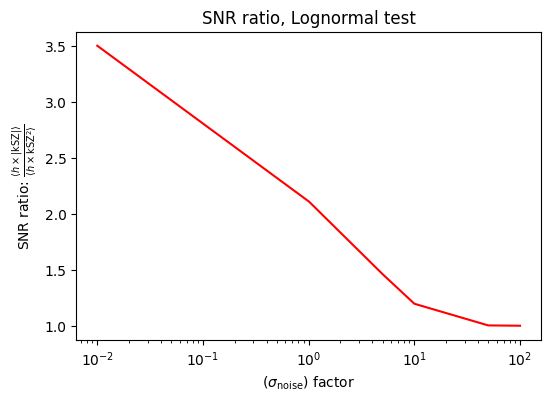

In [24]:
import matplotlib.pyplot as pl
pl.figure(figsize=(6,4))
# pl.plot(noise_std_level_array, snr_orig_all, 'b-', label='original')
# pl.plot(noise_std_level_array, snr_abs_all, 'r-', label='Absolute')
# pl.plot(noise_std_level_array, snr_sq_all, 'g-', label='Square')

# pl.plot(noise_std_level_array, snr_orig_all, 'b-', label='original')
pl.plot(noise_std_level_array+1e-2, snr_abs_all/snr_sq_all, 'r-', label='Absolute')
# pl.plot(noise_std_level_array, snr_sq_all, 'g-', label='Square')
pl.ylabel(r'SNR ratio: $\frac{\langle h \times |{\rm kSZ}| \rangle}{\langle h \times {\rm kSZ}^2 \rangle}$')
pl.xlabel(r'$(\sigma_{\rm noise})$ factor')
pl.xscale('log')
pl.title('SNR ratio, Lognormal test')
# pl.legend(loc='best')

In [13]:
from tqdm import tqdm
# js = 1
noise_std_level = 100
nside = 128
npix = hp.nside2npix(nside)
nsims = 2048
cl1_all = []
cl2_all = []
cl12_all = []
cl12_abs_all = []
cl12_sq_all = []
for ji in tqdm(range(nsims)):
    grf1_noiseless = np.exp(np.random.normal(size=npix))
    grf1 = grf1_noiseless + noise_std_level*np.std(grf1_noiseless)*np.random.randn(npix)
    # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
    vel_random = 0.1*(np.random.normal(size=npix))
    grf2_noiseless = (grf1) * vel_random
    grf2 = grf2_noiseless + noise_std_level*np.std(grf2_noiseless)*np.random.randn(npix)

    # get the power spectrum:
    # cl1 = hp.anafast(grf1)
    # cl2 = hp.anafast(grf2)
    # cl12 = hp.anafast(grf1, grf2)
    cl12_abs = hp.anafast(grf1, np.abs(grf2))
    cl12_sq = hp.anafast(grf1, grf2**2)

    # cl1_all.append(cl1)
    # cl2_all.append(cl2)
    # cl12_all.append(cl12)
    cl12_abs_all.append(cl12_abs)
    cl12_sq_all.append(cl12_sq)

# cl1_all = np.array(cl1_all)
# cl2_all = np.array(cl2_all)
# cl12_all = np.array(cl12_all)
cl12_abs_all = np.array(cl12_abs_all)
cl12_sq_all = np.array(cl12_sq_all)

# cl1_mean = np.mean(cl1_all, axis=0)
# cl2_mean = np.mean(cl2_all, axis=0)
# cl12_mean = np.mean(cl12_all, axis=0)
cl12_abs_mean = np.mean(cl12_abs_all, axis=0)
cl12_sq_mean = np.mean(cl12_sq_all, axis=0)

# cl1_std = np.std(cl1_all, axis=0)
# cl2_std = np.std(cl2_all, axis=0)
# cl12_std = np.std(cl12_all, axis=0)
cl12_abs_std = np.std(cl12_abs_all, axis=0)
cl12_sq_std = np.std(cl12_sq_all, axis=0)


# snr_orig = np.sqrt(np.matmul(cl12_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_all.T)), cl12_mean[:,None])))

snr_abs = np.sqrt(np.matmul(cl12_abs_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_abs_all.T)), cl12_abs_mean[:,None])))

snr_sq = np.sqrt(np.matmul(cl12_sq_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_sq_all.T)), cl12_sq_mean[:,None])))


# snr_orig_all[js] = snr_orig
# snr_abs_all[js] = snr_abs
# snr_sq_all[js] = snr_sq

# print('for noise level = ', noise_std_level_array[js], '; snr_orig = ', snr_orig, ' snr_abs = ', snr_abs, ' snr_sq = ', snr_sq)
print('for noise level = ', noise_std_level, ' snr_abs = ', snr_abs, ' snr_sq = ', snr_sq)




100%|██████████| 2048/2048 [01:49<00:00, 18.65it/s]

for noise level =  1.0  snr_abs =  [[3.8380051]]  snr_sq =  [[3.83778754]]


[[0.4734128]]
[[181.46892524]]
[[54.51430277]]


In [42]:

# snr_abs

array([[181.46892524]])

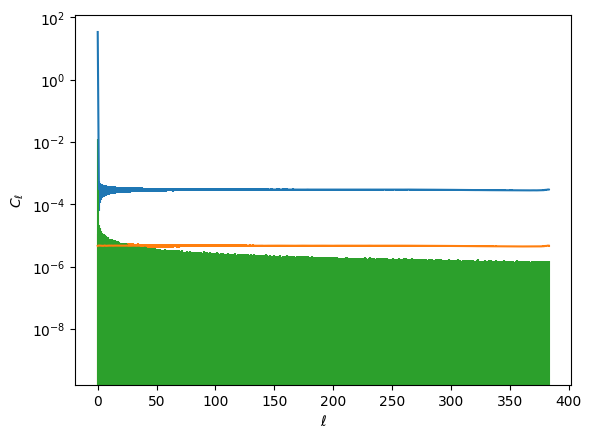

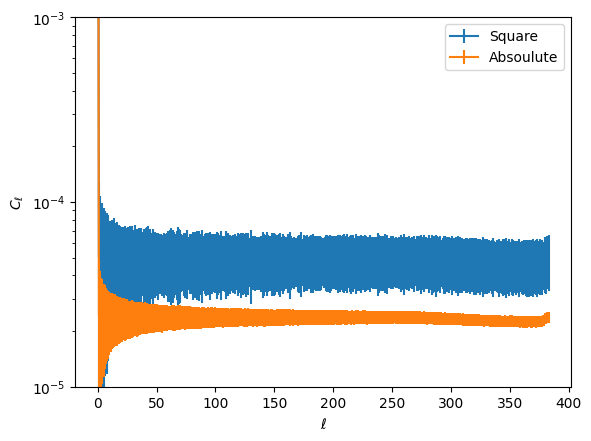

In [32]:
ell = np.arange(len(cl1_mean))
pl.figure()
pl.errorbar(ell, cl1_mean, yerr=cl1_std, label='cl1')
pl.errorbar(ell, cl2_mean, yerr=cl2_std, label='cl2')
pl.errorbar(ell, cl12_mean, yerr=cl12_std, label='cl12')
pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
# pl.xscale('log')
pl.yscale('log')

pl.figure()
pl.errorbar(ell, cl12_sq_mean, yerr=cl12_sq_std, label='Square')
pl.errorbar(ell, cl12_abs_mean, yerr=cl12_abs_std, label='Absoulute')
pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
pl.ylim(1e-5, 1e-3)
# pl.errorbar(ell, cl12_mean, yerr=cl12_std, label='cl12')
# pl.xscale('log')
pl.yscale('log')
pl.legend()



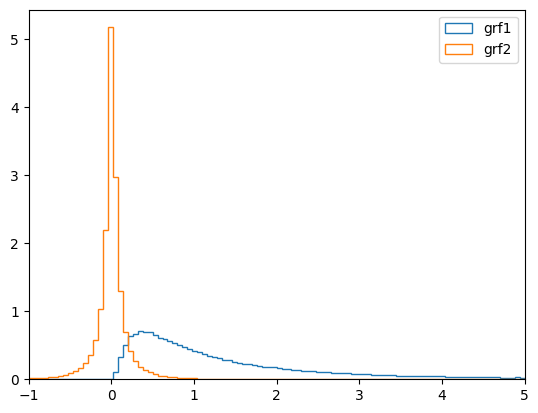

In [38]:
# grf1 = hp.
grf1 = np.exp(np.random.normal(size=npix))
# grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
vel_random = 0.1*(np.random.normal(size=npix))
grf2 = (grf1) * vel_random

pl.figure()
_ = pl.hist(grf1, bins=100, range=(-1,5), density=True, histtype='step', label='grf1')
_ = pl.hist(grf2, bins=100, range=(-1,5), density=True,histtype='step', label='grf2')
pl.xlim(-1,5)
pl.legend()



In [20]:
from tqdm import tqdm
nside = 128
npix = hp.nside2npix(nside)
nsims = 2048
cl1_all = []
cl2_all = []
cl12_all = []
cl12_abs_all = []
cl12_sq_all = []
for ji in tqdm(range(nsims)):
    # grf1 = np.exp(np.random.normal(size=npix))
    # # grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
    # vel_random = 0.1*(np.random.normal(size=npix))
    # grf2 = (grf1) * vel_random

    grf1 = 1. + 0.2*(np.random.normal(size=npix))
    vel_random = 0.1*(np.random.normal(size=npix))
    grf2 = (grf1) * vel_random    

    # get the power spectrum:
    cl1 = hp.anafast(grf1)
    cl2 = hp.anafast(grf2)
    cl12 = hp.anafast(grf1, grf2)
    cl12_abs = hp.anafast(grf1, np.abs(grf2))
    cl12_sq = hp.anafast(grf1, grf2**2)

    cl1_all.append(cl1)
    cl2_all.append(cl2)
    cl12_all.append(cl12)
    cl12_abs_all.append(cl12_abs)
    cl12_sq_all.append(cl12_sq)





100%|██████████| 2048/2048 [02:57<00:00, 11.54it/s]


In [21]:
cl1_all = np.array(cl1_all)
cl2_all = np.array(cl2_all)
cl12_all = np.array(cl12_all)
cl12_abs_all = np.array(cl12_abs_all)
cl12_sq_all = np.array(cl12_sq_all)

cl1_mean = np.mean(cl1_all, axis=0)
cl2_mean = np.mean(cl2_all, axis=0)
cl12_mean = np.mean(cl12_all, axis=0)
cl12_abs_mean = np.mean(cl12_abs_all, axis=0)
cl12_sq_mean = np.mean(cl12_sq_all, axis=0)

cl1_std = np.std(cl1_all, axis=0)
cl2_std = np.std(cl2_all, axis=0)
cl12_std = np.std(cl12_all, axis=0)
cl12_abs_std = np.std(cl12_abs_all, axis=0)
cl12_sq_std = np.std(cl12_sq_all, axis=0)




In [22]:
snr_orig = np.sqrt(np.matmul(cl12_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_all.T)), cl12_mean[:,None])))
print(snr_orig)
snr_abs = np.sqrt(np.matmul(cl12_abs_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_abs_all.T)), cl12_abs_mean[:,None])))
print(snr_abs)
snr_sq = np.sqrt(np.matmul(cl12_sq_mean[:,None].T, np.matmul(np.linalg.inv(np.cov(cl12_sq_all.T)), cl12_sq_mean[:,None])))
print(snr_sq)



[[0.47523749]]
[[575.98539034]]
[[316.68731202]]


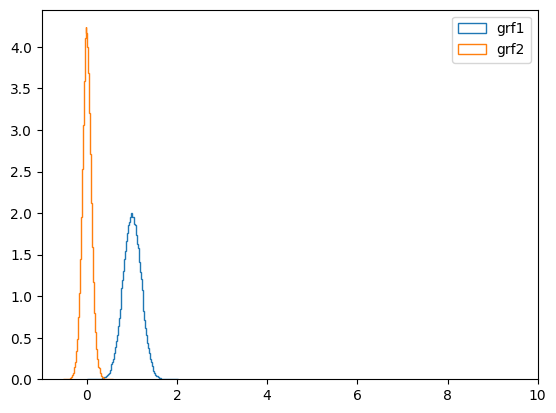

In [39]:
# grf1 = hp.
nside = 128
npix = hp.nside2npix(nside)
# grf1 = np.exp(np.random.normal(size=npix))
grf1 = 1. + 0.2*(np.random.normal(size=npix))
# grf2 = 1. + (grf) * np.abs(np.random.normal(size=npix))
vel_random = 0.1*(np.random.normal(size=npix))
grf2 = (grf1) * vel_random

pl.figure()
_ = pl.hist(grf1, bins=100,density=True, histtype='step', label='grf1')
_ = pl.hist(grf2, bins=100,density=True, histtype='step', label='grf2')
pl.xlim(-1,10)
pl.legend()



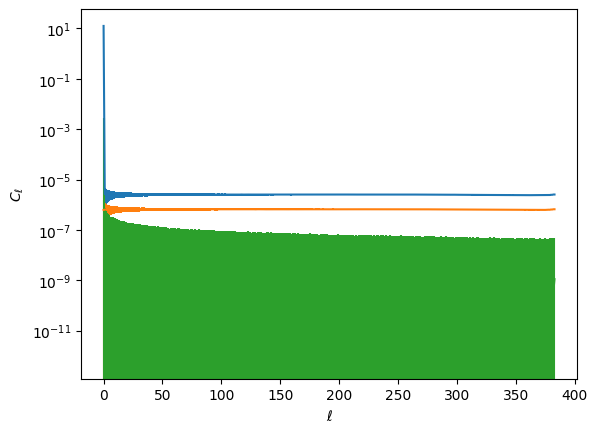

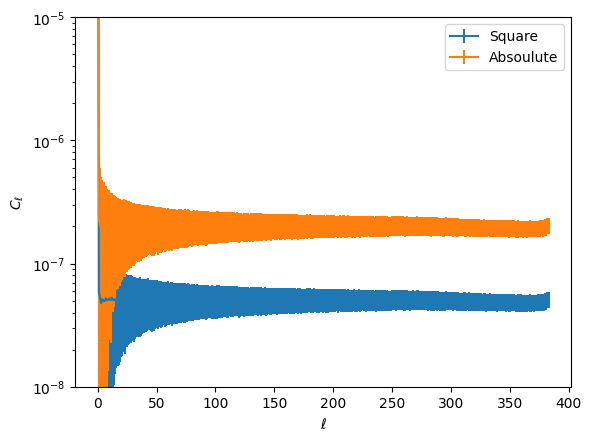

In [26]:
ell = np.arange(len(cl1_mean))
pl.figure()
pl.errorbar(ell, cl1_mean, yerr=cl1_std, label='cl1')
pl.errorbar(ell, cl2_mean, yerr=cl2_std, label='cl2')
pl.errorbar(ell, cl12_mean, yerr=cl12_std, label='cl12')
pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
# pl.xscale('log')
pl.yscale('log')

pl.figure()
pl.errorbar(ell, cl12_sq_mean, yerr=cl12_sq_std, label='Square')
pl.errorbar(ell, cl12_abs_mean, yerr=cl12_abs_std, label='Absoulute')
pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
pl.ylim(1e-8, 1e-5)
# pl.errorbar(ell, cl12_mean, yerr=cl12_std, label='cl12')
# pl.xscale('log')
pl.yscale('log')
pl.legend()



In [44]:
# cl1_mean



In [66]:
# len(M200m_websky)
def ang2eq(theta, phi):
    ra = phi * 180. / np.pi
    dec = 90. - theta * 180. / np.pi
    return ra, dec


def eq2ang(ra, dec):
    phi = ra * np.pi / 180.
    theta = (np.pi / 2.) - dec * (np.pi / 180.)
    return theta, phi

def get_zmean(zcent,delz,nz_bin):
    prob_zcent = nz_bin
    zmean = (np.sum(prob_zcent*zcent*delz))/(np.sum(prob_zcent*delz))
    return zmean






In [73]:
do_jk = True
put_weights_datapoints = True
do_randy_sub = True
nthreads = 128
bin_slop = 0.05

minrad = 20.0
maxrad = 200.0    
nrad = 15
njk = 4096



In [74]:
npix = len(grf1)
# nside_k = hp.npix2nside(npix_ksz)
pix_theta, pix_phi = hp.pix2ang(nside, np.arange(npix))
pix_ra, pix_dec = ang2eq(pix_theta, pix_phi)



In [77]:
import sys, os
save_dir_jk = '/mnt/home/spandey/ceph/SZST/temp/'
save_filename_jk_obj = 'temp_jk_centers_njk' + str(njk)
if os.path.isfile(save_dir_jk + save_filename_jk_obj):
    grf1_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + grf1/np.mean(grf1), ra_units='degrees',
                                dec_units='degrees', patch_centers=save_dir_jk + save_filename_jk_obj)           

else:
    grf1_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + grf1/np.mean(grf1), ra_units='degrees',
                                    dec_units='degrees', npatch=njk)
    grf1_cat.write_patch_centers(save_dir_jk + save_filename_jk_obj)

grf2_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + np.abs(grf2)/np.mean(np.abs(grf2)), ra_units='degrees', dec_units='degrees')

dytruth = treecorr.KKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing orig dataxy calculation')
dytruth.process(grf1_cat, grf2_cat)
# dytruth.calculateXi()

xi_dy_abs = dytruth.xi
r_dy_abs = np.exp(dytruth.meanlogr)
cov_dy_abs = dytruth.cov
sig_dy_abs = np.sqrt(np.diag(cov_dy_abs))
snr_abs = (np.sqrt(np.dot(xi_dy_abs, np.dot(np.linalg.inv(cov_dy_abs), xi_dy_abs))))




doing orig dataxy calculation


In [ ]:
import sys, os
save_dir_jk = '/mnt/home/spandey/ceph/SZST/temp/'
save_filename_jk_obj = 'temp_jk_centers_njk' + str(njk)
if os.path.isfile(save_dir_jk + save_filename_jk_obj):
    grf1_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + grf1/np.mean(grf1), ra_units='degrees',
                                dec_units='degrees', patch_centers=save_dir_jk + save_filename_jk_obj)           

else:
    grf1_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + grf1/np.mean(grf1), ra_units='degrees',
                                    dec_units='degrees', npatch=njk)
    grf1_cat.write_patch_centers(save_dir_jk + save_filename_jk_obj)

grf2_cat = treecorr.Catalog(ra=pix_ra, dec=pix_dec, k=-1 + grf2/np.mean(grf2), ra_units='degrees', dec_units='degrees')

dytruth = treecorr.KKCorrelation(nbins=nrad, min_sep=minrad, max_sep=maxrad, sep_units='arcmin', verbose=0,num_threads=nthreads, bin_slop=bin_slop, var_method='jackknife')

print('doing orig dataxy calculation')
dytruth.process(grf1_cat, grf2_cat)
# dytruth.calculateXi()

xi_dy_full = dytruth.xi
r_dy = np.exp(dytruth.meanlogr)
cov_dy = dytruth.cov
sig_dy = np.sqrt(np.diag(cov_dy))
snr_orig = (np.sqrt(np.dot(xi_dy_full, np.dot(np.linalg.inv(cov_dy), xi_dy_full))))




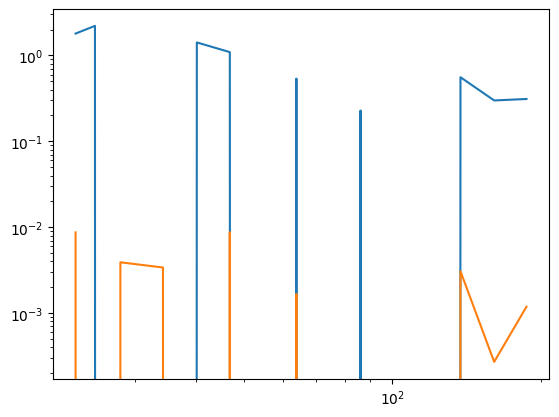

In [78]:
pl.figure()
pl.plot(r_dy, xi_dy_full, label='orig')
pl.plot(r_dy, xi_dy_abs, label='abs')
pl.xscale('log')
pl.yscale('log')
